In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import json
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set style for better visualizations
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
%matplotlib inline

print("🔧 ENERGY CONSUMPTION PREDICTION PIPELINE")
print("="*60)
# Load datasets
print("📊 Loading datasets...")
train_df = pd.read_csv('train_energy_data.csv')
test_df = pd.read_csv('test_energy_data.csv')

print(f"Training data shape: {train_df.shape}")
print(f"Test data shape: {test_df.shape}")

# Display first few rows
print("\n📋 Training Data Preview:")
display(train_df.head())

print("\n📋 Test Data Preview:")
display(test_df.head())

🔧 ENERGY CONSUMPTION PREDICTION PIPELINE
📊 Loading datasets...
Training data shape: (1000, 7)
Test data shape: (100, 7)

📋 Training Data Preview:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,7063,76,10,29.84,Weekday,2713.95
1,Commercial,44372,66,45,16.72,Weekday,5744.99
2,Industrial,19255,37,17,14.30,Weekend,4101.24
3,Residential,13265,14,41,32.82,Weekday,3009.14
4,Commercial,13375,26,18,11.92,Weekday,3279.17



📋 Test Data Preview:


,Building Type,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Day of Week,Energy Consumption
0,Residential,24563,15,4,28.52,Weekday,2865.57
1,Commercial,27583,56,23,23.07,Weekend,4283.80
2,Commercial,45313,4,44,33.56,Weekday,5067.83
3,Residential,41625,84,17,27.39,Weekend,4624.30
4,Residential,36720,58,47,17.08,Weekday,4820.59


In [5]:
# Data Exploration and Analysis
print("\n" + "="*60)
print("🔍 DATA EXPLORATION AND ANALYSIS")
print("="*60)

# Basic information about the datasets
print("\n📝 Training Data Info:")
train_df.info()




🔍 DATA EXPLORATION AND ANALYSIS

📝 Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        1000 non-null   object 
 1   Square Footage       1000 non-null   int64  
 2   Number of Occupants  1000 non-null   int64  
 3   Appliances Used      1000 non-null   int64  
 4   Average Temperature  1000 non-null   float64
 5   Day of Week          1000 non-null   object 
 6   Energy Consumption   1000 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 54.8+ KB


In [6]:
print("\n📝 Test Data Info:")
test_df.info()


📝 Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Building Type        100 non-null    object 
 1   Square Footage       100 non-null    int64  
 2   Number of Occupants  100 non-null    int64  
 3   Appliances Used      100 non-null    int64  
 4   Average Temperature  100 non-null    float64
 5   Day of Week          100 non-null    object 
 6   Energy Consumption   100 non-null    float64
dtypes: float64(2), int64(3), object(2)
memory usage: 5.6+ KB


In [7]:
# Check for missing values
print("\n❓ Missing Values Analysis:")
missing_train = train_df.isnull().sum()
missing_test = test_df.isnull().sum()

missing_summary = pd.DataFrame({
    'Training_Missing': missing_train,
    'Test_Missing': missing_test
})
print(missing_summary)


❓ Missing Values Analysis:
                     Training_Missing  Test_Missing
Building Type                       0             0
Square Footage                      0             0
Number of Occupants                 0             0
Appliances Used                     0             0
Average Temperature                 0             0
Day of Week                         0             0
Energy Consumption                  0             0


In [8]:
# Statistical summary
print("\n📈 Statistical Summary - Training Data:")
display(train_df.describe())

print("\n📈 Statistical Summary - Test Data:")
display(test_df.describe())


📈 Statistical Summary - Training Data:


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,1000.000,1000.000000,1000.000000,1000.000000,1000.000000
mean,25462.388,48.372000,25.606000,22.611390,4166.252570
std,14294.554,29.061972,14.105166,7.139943,933.313064
min,560.000,1.000000,1.000000,10.050000,1683.950000
25%,13169.750,22.000000,13.000000,16.475000,3509.482500
50%,25477.000,47.000000,26.000000,22.815000,4175.730000
75%,37446.250,73.250000,38.000000,28.850000,4863.850000
max,49997.000,99.000000,49.000000,34.990000,6530.600000



📈 Statistical Summary - Test Data:


,Square Footage,Number of Occupants,Appliances Used,Average Temperature,Energy Consumption
count,100.000000,100.000000,100.000000,100.000000,100.00000
mean,25881.920000,47.230000,26.970000,22.043300,4187.57830
std,13711.075264,29.905526,14.237846,6.957951,832.55985
min,1161.000000,2.000000,1.000000,10.400000,2351.97000
25%,14161.000000,21.000000,16.750000,15.682500,3621.92500
50%,27582.500000,47.000000,27.500000,21.970000,4249.39000
75%,38109.500000,73.000000,39.250000,27.492500,4797.17500
max,49354.000000,99.000000,49.000000,34.710000,6042.56000



📊 DATA VISUALIZATION


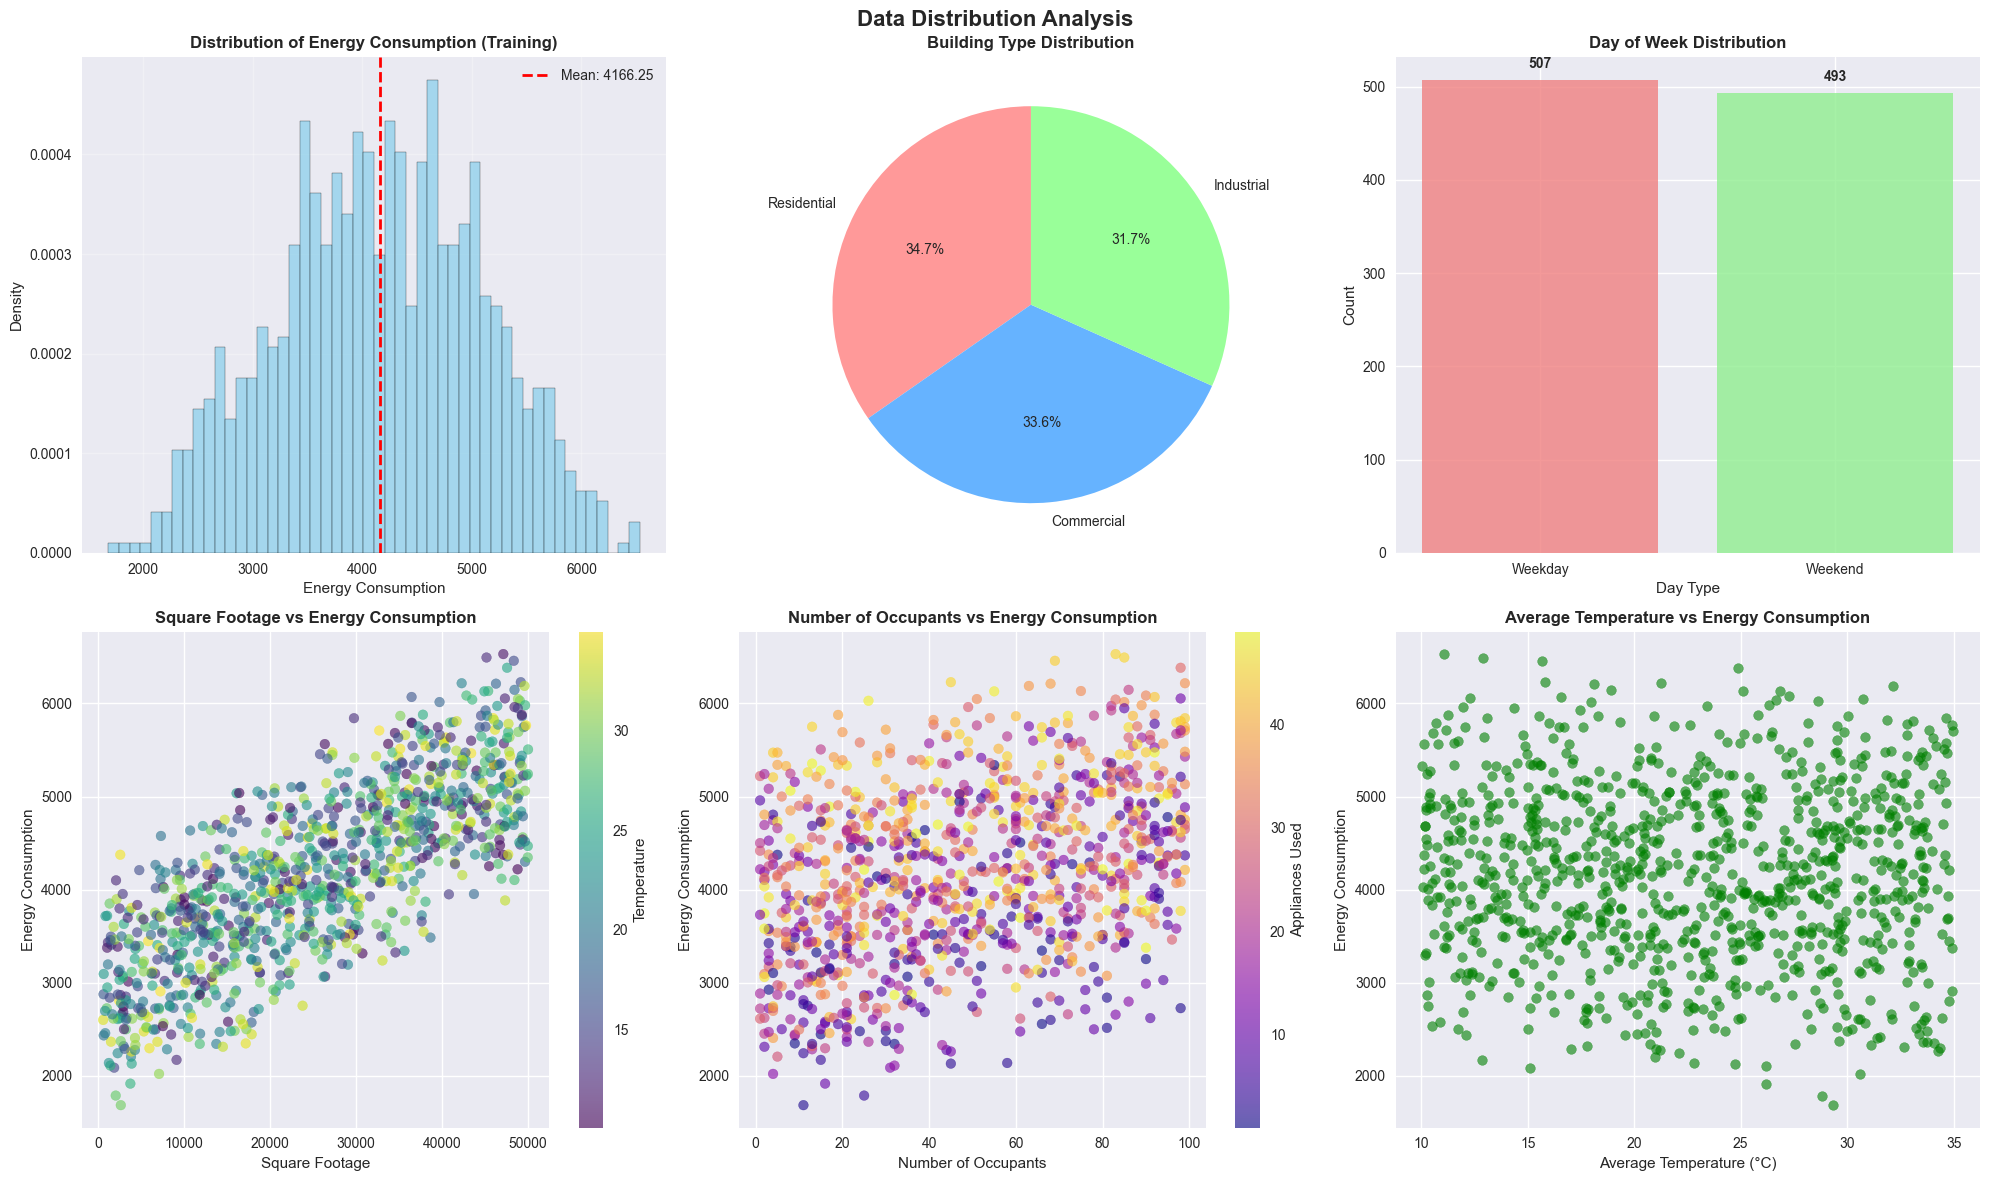

In [14]:
# Data Visualization
print("\n" + "="*60)
print("📊 DATA VISUALIZATION")
print("="*60)

# Set up the plotting area
fig, axes = plt.subplots(2, 3, figsize=(20, 12))
fig.suptitle('Data Distribution Analysis', fontsize=16, fontweight='bold')

# 1. Distribution of Energy Consumption (Target Variable)
axes[0,0].hist(train_df['Energy Consumption'], bins=50, alpha=0.7, color='skyblue', edgecolor='black', density=True)
axes[0,0].axvline(train_df['Energy Consumption'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {train_df["Energy Consumption"].mean():.2f}')
axes[0,0].set_title('Distribution of Energy Consumption (Training)', fontweight='bold')
axes[0,0].set_xlabel('Energy Consumption')
axes[0,0].set_ylabel('Density')
axes[0,0].legend()
axes[0,0].grid(True, alpha=0.3)

# 2. Building Type distribution
building_type_counts = train_df['Building Type'].value_counts()
colors = ['#ff9999', '#66b3ff', '#99ff99']
axes[0,1].pie(building_type_counts.values, labels=building_type_counts.index, autopct='%1.1f%%', 
              colors=colors, startangle=90)
axes[0,1].set_title('Building Type Distribution', fontweight='bold')

# 3. Day of Week distribution
day_counts = train_df['Day of Week'].value_counts()
axes[0,2].bar(day_counts.index, day_counts.values, color=['lightcoral', 'lightgreen'], alpha=0.8)
axes[0,2].set_title('Day of Week Distribution', fontweight='bold')
axes[0,2].set_xlabel('Day Type')
axes[0,2].set_ylabel('Count')
for i, v in enumerate(day_counts.values):
    axes[0,2].text(i, v + 10, str(v), ha='center', va='bottom', fontweight='bold')

# 4. Square Footage vs Energy Consumption
scatter1 = axes[1,0].scatter(train_df['Square Footage'], train_df['Energy Consumption'], 
                           alpha=0.6, c=train_df['Average Temperature'], cmap='viridis')
axes[1,0].set_title('Square Footage vs Energy Consumption', fontweight='bold')
axes[1,0].set_xlabel('Square Footage')
axes[1,0].set_ylabel('Energy Consumption')
plt.colorbar(scatter1, ax=axes[1,0], label='Temperature')

# 5. Number of Occupants vs Energy Consumption
scatter2 = axes[1,1].scatter(train_df['Number of Occupants'], train_df['Energy Consumption'], 
                           alpha=0.6, c=train_df['Appliances Used'], cmap='plasma')
axes[1,1].set_title('Number of Occupants vs Energy Consumption', fontweight='bold')
axes[1,1].set_xlabel('Number of Occupants')
axes[1,1].set_ylabel('Energy Consumption')
plt.colorbar(scatter2, ax=axes[1,1], label='Appliances Used')

# 6. Average Temperature vs Energy Consumption
axes[1,2].scatter(train_df['Average Temperature'], train_df['Energy Consumption'], 
                 alpha=0.6, color='green')
axes[1,2].set_title('Average Temperature vs Energy Consumption', fontweight='bold')
axes[1,2].set_xlabel('Average Temperature (°C)')
axes[1,2].set_ylabel('Energy Consumption')

plt.tight_layout()
plt.show()




🔗 Correlation Matrix:


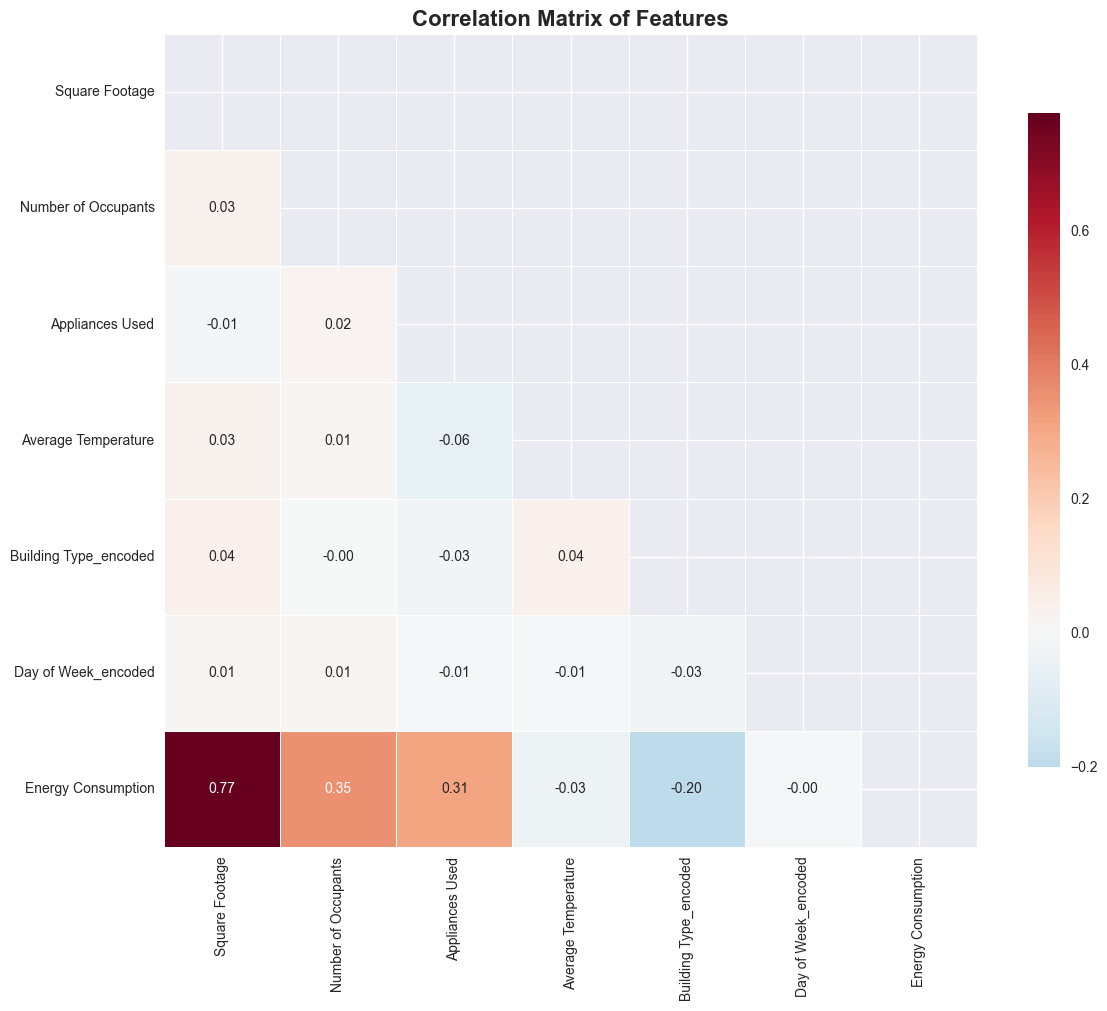

In [15]:
# Correlation Matrix
print("\n🔗 Correlation Matrix:")
plt.figure(figsize=(12, 10))

# Encode categorical variables for correlation matrix
temp_df = train_df.copy()
le_building = LabelEncoder()
le_day = LabelEncoder()
temp_df['Building Type_encoded'] = le_building.fit_transform(temp_df['Building Type'])
temp_df['Day of Week_encoded'] = le_day.fit_transform(temp_df['Day of Week'])

numeric_cols = ['Square Footage', 'Number of Occupants', 'Appliances Used', 
                'Average Temperature', 'Building Type_encoded', 'Day of Week_encoded', 
                'Energy Consumption']

correlation_matrix = temp_df[numeric_cols].corr()

mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='RdBu_r', center=0,
           square=True, linewidths=0.5, mask=mask, fmt='.2f',
           cbar_kws={"shrink": .8})
plt.title('Correlation Matrix of Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()



📈 Additional Visualizations:


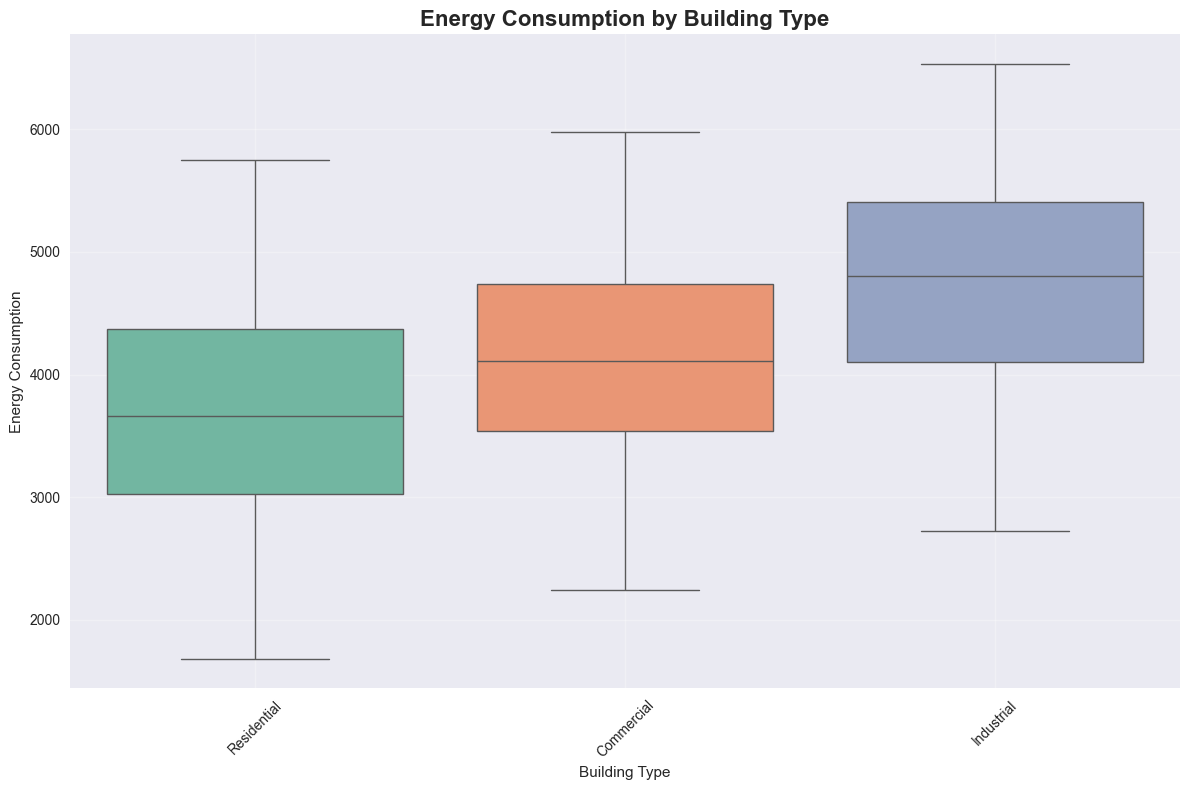

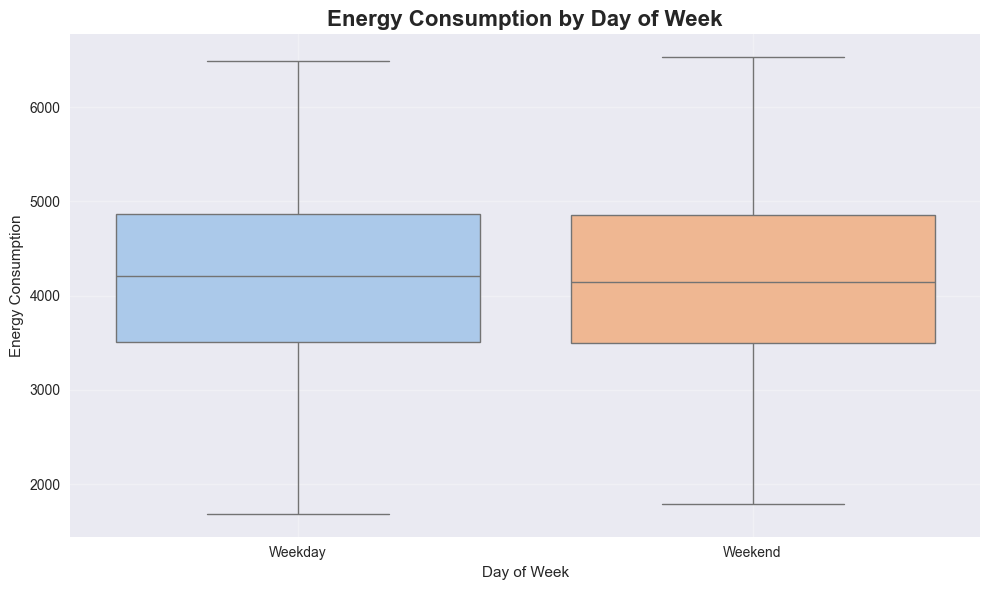


⚙️ DATA PREPROCESSING
Original training samples: 1000
Combined dataset shape: (1100, 7)


In [16]:
# Additional Visualizations
print("\n📈 Additional Visualizations:")

# Boxplot of Energy Consumption by Building Type
plt.figure(figsize=(12, 8))
sns.boxplot(x='Building Type', y='Energy Consumption', data=train_df, palette='Set2')
plt.title('Energy Consumption by Building Type', fontsize=16, fontweight='bold')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Energy Consumption by Day of Week
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day of Week', y='Energy Consumption', data=train_df, palette='pastel')
plt.title('Energy Consumption by Day of Week', fontsize=16, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Data Preprocessing
print("\n" + "="*60)
print("⚙️ DATA PREPROCESSING")
print("="*60)

# Combine train and test for consistent preprocessing
original_train_len = len(train_df)
combined_df = pd.concat([train_df, test_df], ignore_index=True)

print(f"Original training samples: {original_train_len}")
print(f"Combined dataset shape: {combined_df.shape}")


In [17]:
# Handle missing values
print("\n🔧 Handling missing values...")
if combined_df.isnull().sum().sum() > 0:
    print("Missing values found. Imputing...")
    numerical_cols = combined_df.select_dtypes(include=[np.number]).columns
    categorical_cols = combined_df.select_dtypes(include=['object']).columns
    
    num_imputer = SimpleImputer(strategy='median')
    combined_df[numerical_cols] = num_imputer.fit_transform(combined_df[numerical_cols])
    
    cat_imputer = SimpleImputer(strategy='most_frequent')
    combined_df[categorical_cols] = cat_imputer.fit_transform(combined_df[categorical_cols])
else:
    print("✅ No missing values found.")



🔧 Handling missing values...
✅ No missing values found.


In [20]:
# Feature Engineering
print("\n🔧 Performing feature engineering...")

# Encode categorical variables
le_building = LabelEncoder()
le_day = LabelEncoder()

combined_df['Building Type_encoded'] = le_building.fit_transform(combined_df['Building Type'])
combined_df['Day of Week_encoded'] = le_day.fit_transform(combined_df['Day of Week'])

# Create interaction features
combined_df['Area_Per_Occupant'] = combined_df['Square Footage'] / (combined_df['Number of Occupants'] + 1)
combined_df['Appliance_Usage_Ratio'] = combined_df['Appliances Used'] / (combined_df['Number of Occupants'] + 1)
combined_df['Total_Load_Factor'] = combined_df['Square Footage'] * combined_df['Number of Occupants'] * combined_df['Appliances Used']
combined_df['Temperature_Squared'] = combined_df['Average Temperature'] ** 2
combined_df['Occupant_Density'] = combined_df['Number of Occupants'] / (combined_df['Square Footage'] + 1)

# Create building type specific features
for building_type in combined_df['Building Type'].unique():
    combined_df[f'Is_{building_type}'] = (combined_df['Building Type'] == building_type).astype(int)

# Split back into train and test
train_processed = combined_df.iloc[:original_train_len].copy()
test_processed = combined_df.iloc[original_train_len:].copy()

print(f"✅ Processed training data shape: {train_processed.shape}")
print(f"✅ Processed test data shape: {test_processed.shape}")



🔧 Performing feature engineering...
✅ Processed training data shape: (1000, 17)
✅ Processed test data shape: (100, 17)


In [23]:
# Define features and target
base_features = ['Square Footage', 'Number of Occupants', 'Appliances Used', 
                'Average Temperature', 'Building Type_encoded', 'Day of Week_encoded']

engineered_features = ['Area_Per_Occupant', 'Appliance_Usage_Ratio', 'Total_Load_Factor',
                      'Temperature_Squared', 'Occupant_Density']

building_features = [f'Is_{bt}' for bt in combined_df['Building Type'].unique()]

feature_columns = base_features + engineered_features + building_features

X_train = train_processed[feature_columns]
y_train = train_processed['Energy Consumption']

X_test = test_processed[feature_columns]
y_test = test_processed['Energy Consumption']

print(f"\n📋 Feature Summary:")
print(f"Total features: {len(feature_columns)}")
print(f"Base features: {len(base_features)}")
print(f"Engineered features: {len(engineered_features)}")
print(f"Building type features: {len(building_features)}")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
# Feature Scaling
print("\n🔧 Applying feature scaling...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed.")



📋 Feature Summary:
Total features: 14
Base features: 6
Engineered features: 5
Building type features: 3
X_train shape: (1000, 14), y_train shape: (1000,)
X_test shape: (100, 14), y_test shape: (100,)

🔧 Applying feature scaling...
✅ Feature scaling completed.


In [ ]:
# Model Building - LINEAR REGRESSION
print("\n" + "="*60)
print("📈 LINEAR REGRESSION MODELS")
print("="*60)

# Initialize linear models
linear_models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0)
}

linear_results = {}

print("Training Linear Models...")
for name, model in linear_models.items():
    print(f"\n🔧 Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    linear_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': {
            'train': y_train_pred,
            'test': y_test_pred
        }
    }
    
    print(f"✅ {name} Results:")
    print(f"   Train R²: {train_r2:.4f}")
    print(f"   Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:.2f}")
    print(f"   Test RMSE: {test_rmse:.2f}")
    print(f"   Cross-validation R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")

# Model Building - RANDOM FOREST
print("\n" + "="*60)
print("🌲 RANDOM FOREST MODELS")
print("="*60)

# Initialize Random Forest models
rf_models = {
    'Random Forest (Default)': RandomForestRegressor(n_estimators=100, random_state=42),
    'Random Forest (Tuned)': RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
}

rf_results = {}

print("Training Random Forest Models...")
for name, model in rf_models.items():
    print(f"\n🔧 Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    rf_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': {
            'train': y_train_pred,
            'test': y_test_pred
        }
    }
    
    print(f"✅ {name} Results:")
    print(f"   Train R²: {train_r2:.4f}")
    print(f"   Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:.2f}")
    print(f"   Test RMSE: {test_rmse:.2f}")
    print(f"   Cross-validation R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")




📈 LINEAR REGRESSION MODELS
Training Linear Models...

🔧 Training Linear Regression...
✅ Linear Regression Results:
   Train R²: 1.0000
   Test R²: 1.0000
   Train RMSE: 0.01
   Test RMSE: 0.01
   Cross-validation R²: 1.0000 (+/- 0.0000)

🔧 Training Ridge Regression...
✅ Ridge Regression Results:
   Train R²: 1.0000
   Test R²: 1.0000
   Train RMSE: 1.52
   Test RMSE: 1.28
   Cross-validation R²: 1.0000 (+/- 0.0000)

🔧 Training Lasso Regression...
✅ Lasso Regression Results:
   Train R²: 1.0000
   Test R²: 1.0000
   Train RMSE: 2.65
   Test RMSE: 2.41
   Cross-validation R²: 1.0000 (+/- 0.0000)


In [28]:
# Model Building - RANDOM FOREST
print("\n" + "="*60)
print("🌲 RANDOM FOREST MODELS")
print("="*60)

# Initialize Random Forest models
rf_models = {
    'Random Forest (Default)': RandomForestRegressor(n_estimators=100, random_state=42),
    'Random Forest (Tuned)': RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, random_state=42)
}

rf_results = {}

print("Training Random Forest Models...")
for name, model in rf_models.items():
    print(f"\n🔧 Training {name}...")
    
    # Train model
    model.fit(X_train_scaled, y_train)
    
    # Predictions
    y_train_pred = model.predict(X_train_scaled)
    y_test_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    train_r2 = r2_score(y_train, y_train_pred)
    test_r2 = r2_score(y_test, y_test_pred)
    train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
    train_mae = mean_absolute_error(y_train, y_train_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)
    
    # Cross-validation
    cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='r2')
    
    rf_results[name] = {
        'model': model,
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'train_mae': train_mae,
        'test_mae': test_mae,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'predictions': {
            'train': y_train_pred,
            'test': y_test_pred
        }
    }
    
    print(f"✅ {name} Results:")
    print(f"   Train R²: {train_r2:.4f}")
    print(f"   Test R²: {test_r2:.4f}")
    print(f"   Train RMSE: {train_rmse:.2f}")
    print(f"   Test RMSE: {test_rmse:.2f}")
    print(f"   Cross-validation R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")




🌲 RANDOM FOREST MODELS
Training Random Forest Models...

🔧 Training Random Forest (Default)...
✅ Random Forest (Default) Results:
   Train R²: 0.9975
   Test R²: 0.9743
   Train RMSE: 46.36
   Test RMSE: 132.76
   Cross-validation R²: 0.9805 (+/- 0.0022)

🔧 Training Random Forest (Tuned)...
✅ Random Forest (Tuned) Results:
   Train R²: 0.9963
   Test R²: 0.9730
   Train RMSE: 57.02
   Test RMSE: 136.17
   Cross-validation R²: 0.9799 (+/- 0.0028)


In [32]:
# Combine all results
all_results = {**linear_results, **rf_results}
# Model Comparison
print("\n" + "="*60)
print("📊 MODEL COMPARISON")
print("="*60)

comparison_data = []
for name, results in all_results.items():
    comparison_data.append({
        'Model': name,
        'Train_R2': results['train_r2'],
        'Test_R2': results['test_r2'],
        'Test_RMSE': results['test_rmse'],
        'Test_MAE': results['test_mae'],
        'CV_Mean_R2': results['cv_mean'],
        'CV_Std_R2': results['cv_std']
    })

comparison_df = pd.DataFrame(comparison_data)
comparison_df = comparison_df.sort_values('Test_R2', ascending=False)
print("Model Performance Comparison (sorted by Test R²):")
display(comparison_df.style.format({
    'Train_R2': '{:.4f}',
    'Test_R2': '{:.4f}',
    'Test_RMSE': '{:.2f}',
    'Test_MAE': '{:.2f}',
    'CV_Mean_R2': '{:.4f}',
    'CV_Std_R2': '{:.4f}'
}).background_gradient(subset=['Test_R2'], cmap='RdYlGn'))



📊 MODEL COMPARISON
Model Performance Comparison (sorted by Test R²):


,Model,Train_R2,Test_R2,Test_RMSE,Test_MAE,CV_Mean_R2,CV_Std_R2
0,Linear Regression,1.0000,1.0000,0.01,0.01,1.0000,0.0000
1,Ridge Regression,1.0000,1.0000,1.28,1.04,1.0000,0.0000
2,Lasso Regression,1.0000,1.0000,2.41,1.98,1.0000,0.0000
3,Random Forest (Default),0.9975,0.9743,132.76,97.36,0.9805,0.0011
4,Random Forest (Tuned),0.9963,0.9730,136.17,100.73,0.9799,0.0014


In [33]:
# Select best model
best_model_name = comparison_df.iloc[0]['Model']
best_model = all_results[best_model_name]['model']
best_test_r2 = comparison_df.iloc[0]['Test_R2']

print(f"\n🏆 Best Model: {best_model_name}")
print(f"🏆 Best Test R²: {best_test_r2:.4f}")


🏆 Best Model: Linear Regression
🏆 Best Test R²: 1.0000



📈 MODEL PERFORMANCE VISUALIZATION


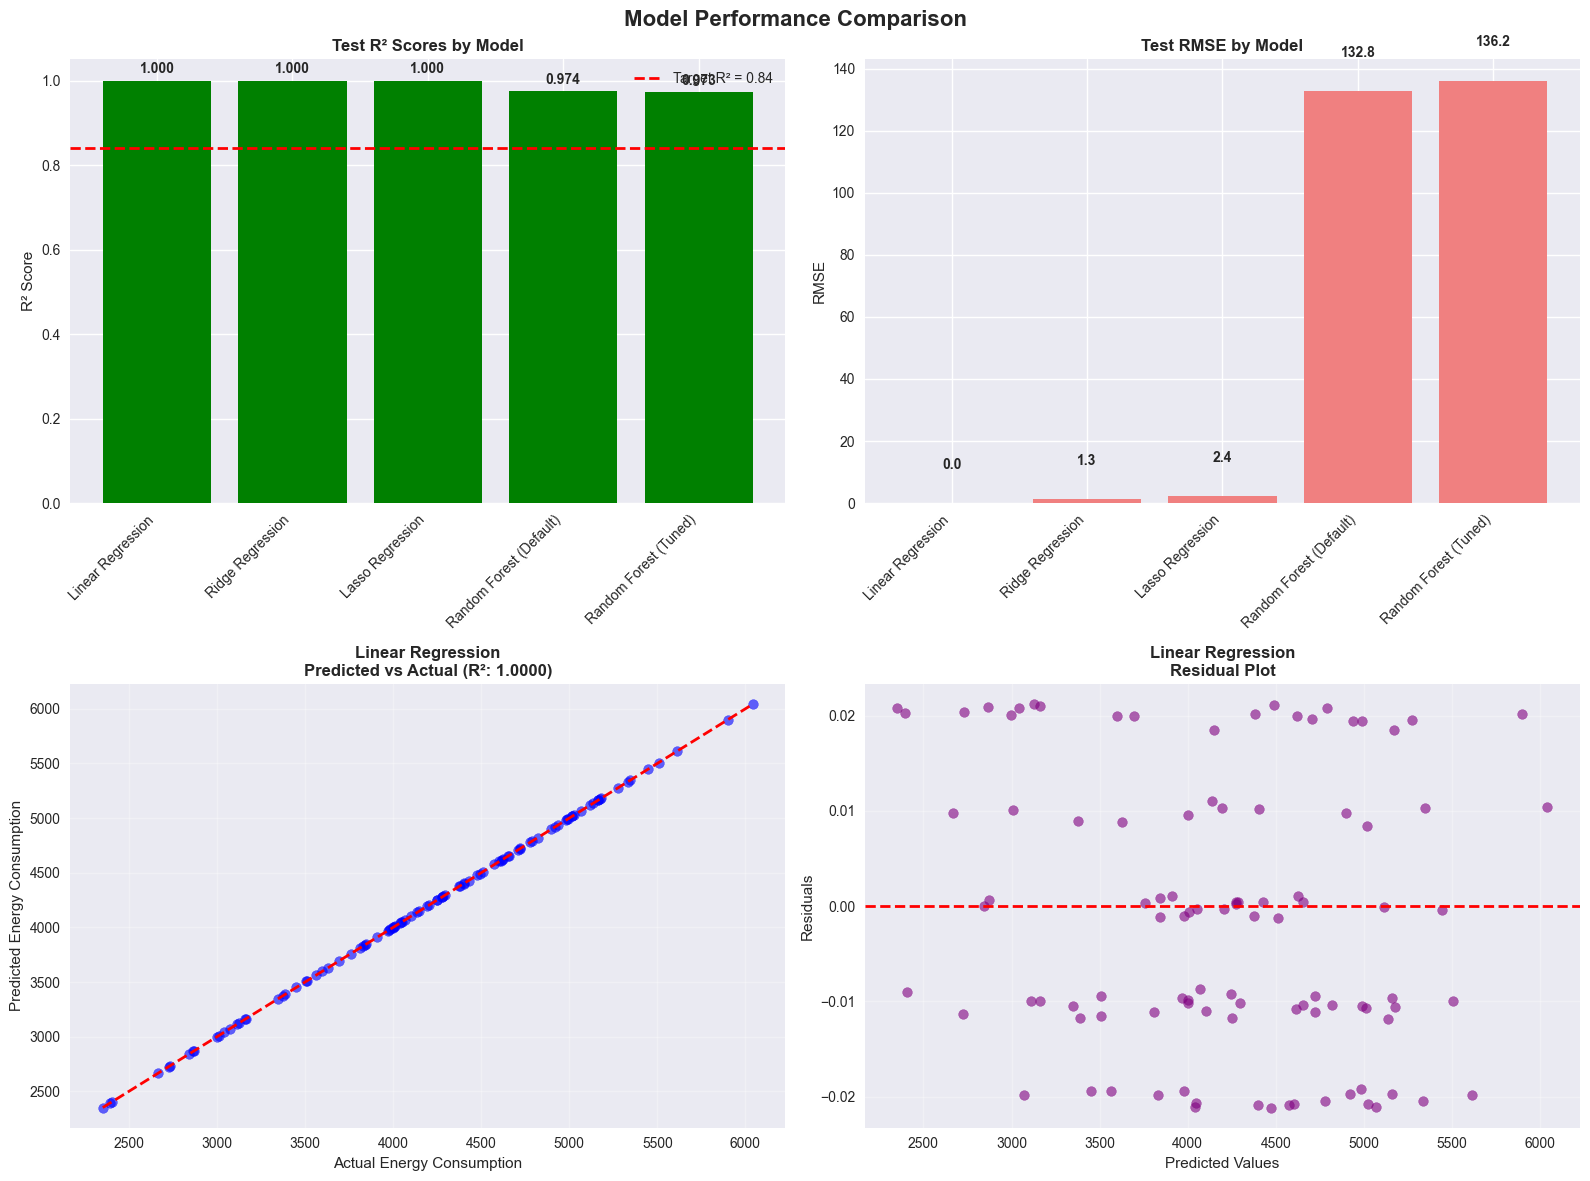

In [35]:
# Visualization of Model Performance
print("\n" + "="*60)
print("📈 MODEL PERFORMANCE VISUALIZATION")
print("="*60)

# Create comparison plots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Model Performance Comparison', fontsize=16, fontweight='bold')

# 1. R² Score Comparison
models = comparison_df['Model'].values
test_r2_scores = comparison_df['Test_R2'].values

bars = axes[0,0].bar(models, test_r2_scores, color=['green' if x >= 0.84 else 'orange' for x in test_r2_scores])
axes[0,0].set_title('Test R² Scores by Model', fontweight='bold')
axes[0,0].set_ylabel('R² Score')
axes[0,0].axhline(y=0.84, color='red', linestyle='--', linewidth=2, label='Target R² = 0.84')
axes[0,0].set_xticklabels(models, rotation=45, ha='right')
axes[0,0].legend()
# Add value labels on bars
for bar, value in zip(bars, test_r2_scores):
    axes[0,0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
                  f'{value:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. RMSE Comparison
test_rmse_scores = comparison_df['Test_RMSE'].values
bars = axes[0,1].bar(models, test_rmse_scores, color='lightcoral')
axes[0,1].set_title('Test RMSE by Model', fontweight='bold')
axes[0,1].set_ylabel('RMSE')
axes[0,1].set_xticklabels(models, rotation=45, ha='right')

# Add value labels on bars
for bar, value in zip(bars, test_rmse_scores):
    axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
                  f'{value:.1f}', ha='center', va='bottom', fontweight='bold')

# 3. Best Model - Predicted vs Actual
best_predictions = all_results[best_model_name]['predictions']['test']
axes[1,0].scatter(y_test, best_predictions, alpha=0.6, color='blue')
axes[1,0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1,0].set_xlabel('Actual Energy Consumption')
axes[1,0].set_ylabel('Predicted Energy Consumption')
axes[1,0].set_title(f'{best_model_name}\nPredicted vs Actual (R²: {best_test_r2:.4f})', fontweight='bold')
axes[1,0].grid(True, alpha=0.3)

# 4. Best Model - Residuals
residuals = y_test - best_predictions
axes[1,1].scatter(best_predictions, residuals, alpha=0.6, color='purple')
axes[1,1].axhline(y=0, color='red', linestyle='--', linewidth=2)
axes[1,1].set_xlabel('Predicted Values')
axes[1,1].set_ylabel('Residuals')
axes[1,1].set_title(f'{best_model_name}\nResidual Plot', fontweight='bold')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [37]:
# Feature Importance Analysis
print("\n" + "="*60)
print("🔍 FEATURE IMPORTANCE ANALYSIS")
print("="*60)

if 'Random Forest' in best_model_name:
    print("📊 Random Forest Feature Importance:")
    feature_importance = pd.DataFrame({
        'feature': feature_columns,
        'importance': best_model.feature_importances_
    }).sort_values('importance', ascending=False)
    
    display(feature_importance.head(10).style.format({'importance': '{:.4f}'}))
    
    # Plot top 10 features
    plt.figure(figsize=(12, 8))
    top_features = feature_importance.head(10)
    sns.barplot(x='importance', y='feature', data=top_features, palette='viridis')
    plt.title(f'Top 10 Feature Importance - {best_model_name}', fontsize=16, fontweight='bold')
    plt.xlabel('Feature Importance')
    plt.tight_layout()
    plt.show()

    # Model Interpretation for Linear Models
linear_model_names = [name for name in all_results.keys() if any(x in name for x in ['Linear', 'Ridge', 'Lasso'])]
if linear_model_names:
    print("\n📈 Linear Model Coefficients:")
    for model_name in linear_model_names:
        if hasattr(all_results[model_name]['model'], 'coef_'):
            coefficients = pd.DataFrame({
                'feature': feature_columns,
                'coefficient': all_results[model_name]['model'].coef_
            }).sort_values('coefficient', key=abs, ascending=False)
            
            print(f"\n{model_name} - Top 10 Coefficients:")
            display(coefficients.head(10).style.format({'coefficient': '{:.4f}'}))





🔍 FEATURE IMPORTANCE ANALYSIS

📈 Linear Model Coefficients:

Linear Regression - Top 10 Coefficients:


,feature,coefficient
0,Square Footage,714.3702
1,Number of Occupants,290.4749
2,Appliances Used,281.9629
13,Is_Industrial,235.9305
11,Is_Residential,-187.0487
4,Building Type_encoded,-82.6464
12,Is_Commercial,-43.9135
3,Average Temperature,-35.6820
5,Day of Week_encoded,-24.9979
8,Total_Load_Factor,-0.0006



Ridge Regression - Top 10 Coefficients:


,feature,coefficient
0,Square Footage,712.2990
1,Number of Occupants,289.1901
2,Appliances Used,280.6253
13,Is_Industrial,235.7924
11,Is_Residential,-186.9519
4,Building Type_encoded,-82.6126
12,Is_Commercial,-43.8751
3,Average Temperature,-34.5618
5,Day of Week_encoded,-24.9484
8,Total_Load_Factor,2.3859



Lasso Regression - Top 10 Coefficients:


,feature,coefficient
0,Square Footage,712.5784
1,Number of Occupants,288.6560
2,Appliances Used,280.2767
11,Is_Residential,-237.3685
13,Is_Industrial,232.0205
3,Average Temperature,-34.2385
5,Day of Week_encoded,-23.9357
8,Total_Load_Factor,1.6748
9,Temperature_Squared,-0.4537
4,Building Type_encoded,-0.0000


In [39]:
# Model Saving
print("\n" + "="*60)
print("💾 SAVING MODELS AND ARTIFACTS")


# Save the best model
model_filename = 'best_energy_model.pkl'
joblib.dump(best_model, model_filename)
print(f"✅ Best model saved as: {model_filename}")

# Save all models
for name, results in all_results.items():
    safe_name = name.replace(' ', '_').replace('(', '').replace(')', '').replace(' ', '')
    model_path = f'{safe_name}_model.pkl'
    joblib.dump(results['model'], model_path)
    print(f"✅ {name} saved as: {model_path}")

# Save a smaller Random Forest if it's the best
if 'Random Forest' in best_model_name:
    smaller_rf = RandomForestRegressor(n_estimators=50, max_depth=10, random_state=42)
    smaller_rf.fit(X_train_scaled, y_train)
    smaller_rf_filename = 'smaller_rf_model.pkl'
    joblib.dump(smaller_rf, smaller_rf_filename)
    print(f"✅ Smaller Random Forest saved as: {smaller_rf_filename}")

# Save preprocessing objects
preprocessing_artifacts = {
    'scaler': scaler,
    'label_encoder_building': le_building,
    'label_encoder_day': le_day,
    'feature_columns': feature_columns,
    'feature_names': feature_columns
}

preprocessing_filename = 'preprocessing_artifacts.pkl'
joblib.dump(preprocessing_artifacts, preprocessing_filename)
print(f"✅ Preprocessing artifacts saved as: {preprocessing_filename}")

# Save comprehensive model metadata to JSON
model_metadata = {
    'best_model': best_model_name,
    'best_test_r2': float(best_test_r2),
    'best_test_rmse': float(comparison_df.iloc[0]['Test_RMSE']),
    'best_test_mae': float(comparison_df.iloc[0]['Test_MAE']),
    'feature_columns': feature_columns,
    'model_type': type(best_model).__name__,
    'training_samples': len(X_train),
    'test_samples': len(X_test),
    'all_model_performance': comparison_df.to_dict('records'),
    'timestamp': pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')
}

metadata_filename = 'model_metadata.json'
with open(metadata_filename, 'w') as f:
    json.dump(model_metadata, f, indent=2)
print(f"✅ Model metadata saved as: {metadata_filename}")



💾 SAVING MODELS AND ARTIFACTS
✅ Best model saved as: best_energy_model.pkl
✅ Linear Regression saved as: Linear_Regression_model.pkl
✅ Ridge Regression saved as: Ridge_Regression_model.pkl
✅ Lasso Regression saved as: Lasso_Regression_model.pkl
✅ Random Forest (Default) saved as: Random_Forest_Default_model.pkl
✅ Random Forest (Tuned) saved as: Random_Forest_Tuned_model.pkl
✅ Preprocessing artifacts saved as: preprocessing_artifacts.pkl
✅ Model metadata saved as: model_metadata.json


In [43]:
# Final Summary
print("\n" + "="*60)
print("🎯 FINAL SUMMARY")


print(f"🏆 Best Model: {best_model_name}")
print(f"📈 Best Test R² Score: {best_test_r2:.4f}")
print(f"📉 Best Test RMSE: {comparison_df.iloc[0]['Test_RMSE']:.2f}")
print(f"📊 Best Test MAE: {comparison_df.iloc[0]['Test_MAE']:.2f}")

if best_test_r2 >= 0.84:
    print("🎉 SUCCESS: Model achieved R² ≥ 0.84!")
else:
    print("⚠️ Model R² is below 0.84. Consider more feature engineering or hyperparameter tuning.")

print(f"\n💾 Saved Files:")
for name in all_results.keys():
    safe_name = name.replace(' ', '_').replace('(', '').replace(')', '').replace(' ', '')
    print(f"   - {safe_name}_model.pkl")
if 'Random Forest' in best_model_name:
    print(f"   - smaller_rf_model.pkl")
print(f"   - {preprocessing_filename}")
print(f"   - {metadata_filename}")

# Example Prediction
print("\n" + "="*60)
print("🔮 EXAMPLE PREDICTION")


# Create sample data for different building types
sample_data = [
    {
        'Square Footage': 25000,
        'Number of Occupants': 50,
        'Appliances Used': 25,
        'Average Temperature': 22.5,
        'Building Type': 'Commercial',
        'Day of Week': 'Weekday'
    },
    {
        'Square Footage': 1500,
        'Number of Occupants': 4,
        'Appliances Used': 8,
        'Average Temperature': 21.0,
        'Building Type': 'Residential',
        'Day of Week': 'Weekend'
    },
    {
        'Square Footage': 50000,
        'Number of Occupants': 20,
        'Appliances Used': 35,
        'Average Temperature': 18.0,
        'Building Type': 'Industrial',
        'Day of Week': 'Weekday'
    }
]

print("Sample Predictions:")
print("-" * 80)
print(f"{'Building Type':<15} {'Square Footage':<15} {'Occupants':<10} {'Appliances':<10} {'Temperature':<12} {'Day':<10} {'Prediction':<12}")
print("-" * 80)

for sample in sample_data:
    sample_df = pd.DataFrame([sample])
    
    # Preprocess the sample data
    sample_df['Building Type_encoded'] = le_building.transform(sample_df['Building Type'])
    sample_df['Day of Week_encoded'] = le_day.transform(sample_df['Day of Week'])
    sample_df['Area_Per_Occupant'] = sample_df['Square Footage'] / (sample_df['Number of Occupants'] + 1)
    sample_df['Appliance_Usage_Ratio'] = sample_df['Appliances Used'] / (sample_df['Number of Occupants'] + 1)
    sample_df['Total_Load_Factor'] = sample_df['Square Footage'] * sample_df['Number of Occupants'] * sample_df['Appliances Used']
    sample_df['Temperature_Squared'] = sample_df['Average Temperature'] ** 2
    sample_df['Occupant_Density'] = sample_df['Number of Occupants'] / (sample_df['Square Footage'] + 1)
    
    # Add building type flags
    for building_type in combined_df['Building Type'].unique():
        sample_df[f'Is_{building_type}'] = (sample_df['Building Type'] == building_type).astype(int)
    
    sample_features = sample_df[feature_columns]
    sample_scaled = scaler.transform(sample_features)
    
    prediction = best_model.predict(sample_scaled)[0]
    
    print(f"{sample['Building Type']:<15} {sample['Square Footage']:<15} {sample['Number of Occupants']:<10} "
          f"{sample['Appliances Used']:<10} {sample['Average Temperature']:<12} {sample['Day of Week']:<10} {prediction:<12.2f}")

print("-" * 80)

print("\n✅ Pipeline completed successfully!")
print("🎯 All models trained, evaluated, and saved!")



🎯 FINAL SUMMARY
🏆 Best Model: Linear Regression
📈 Best Test R² Score: 1.0000
📉 Best Test RMSE: 0.01
📊 Best Test MAE: 0.01
🎉 SUCCESS: Model achieved R² ≥ 0.84!

💾 Saved Files:
   - Linear_Regression_model.pkl
   - Ridge_Regression_model.pkl
   - Lasso_Regression_model.pkl
   - Random_Forest_Default_model.pkl
   - Random_Forest_Tuned_model.pkl
   - preprocessing_artifacts.pkl
   - model_metadata.json

🔮 EXAMPLE PREDICTION
Sample Predictions:
--------------------------------------------------------------------------------
Building Type   Square Footage  Occupants  Appliances Temperature  Day        Prediction  
--------------------------------------------------------------------------------
Commercial      25000           50         25         22.5         Weekday    4187.50     
Residential     1500            4          8          21.0         Weekend    1670.00     
Industrial      50000           20         35         18.0         Weekday    5860.00     
-----------------------------